# Life expectancy and GDP

In this project data on life expectancy and GDP of six countries from the World Health Organization and the World Bank is analyzed and visualized.

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
df = pd.read_csv('all_data.csv')
df.rename(columns = {'Life expectancy at birth (years)':'Life expectancy'}, inplace = True)
df.head()

,Country,Year,Life expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [8]:
df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [30]:
df.describe(include='all')

,Country,Year,Life expectancy,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Mexico,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


## Comparison of Countries

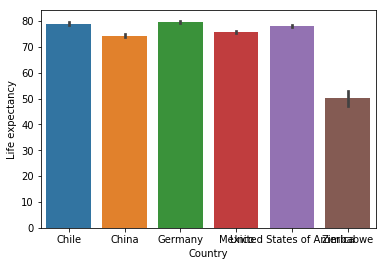

In [28]:
sns.barplot(data=df, x='Country', y='Life expectancy')

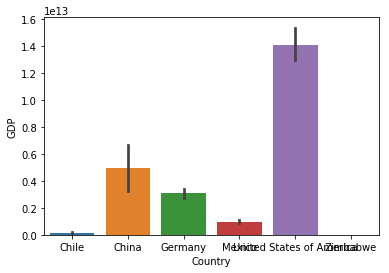

In [29]:
sns.barplot(data=df, x='Country', y='GDP')

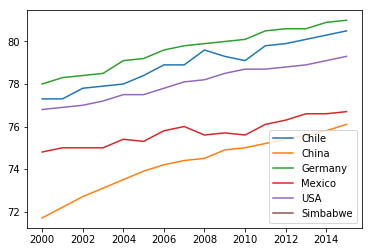

In [39]:
#sns.lineplot(data=df, x='Year', y='Life expectancy', hue='Country')
#years = df[df.Country=='Chile'].Year
plt.plot(df[df.Country=='Chile'].Year, df[df.Country=='Chile']['Life expectancy'], label='Chile')
plt.plot(df[df.Country=='China'].Year, df[df.Country=='China']['Life expectancy'], label='China')
plt.plot(df[df.Country=='Germany'].Year, df[df.Country=='Germany']['Life expectancy'], label='Germany')
plt.plot(df[df.Country=='Mexico'].Year, df[df.Country=='Mexico']['Life expectancy'], label='Mexico')
plt.plot(df[df.Country=='United States of America'].Year, df[df.Country=='United States of America']['Life expectancy'], label='USA')
plt.plot(df[df.Country=='Simbabwe'].Year, df[df.Country=='Simbabwe']['Life expectancy'], label='Simbabwe')
plt.legend()

## Chile

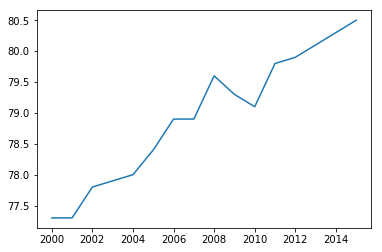

In [16]:
plt.plot(df[df.Country=='Chile'].Year, df[df.Country=='Chile']['Life expectancy'])

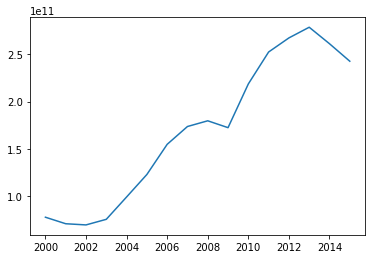

In [22]:
plt.plot(df[df.Country=='Chile'].Year, df[df.Country=='Chile']['GDP'])

## China

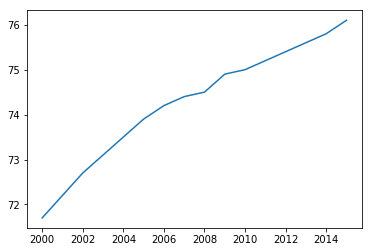

In [31]:
plt.plot(df[df.Country=='China'].Year, df[df.Country=='China']['Life expectancy'])

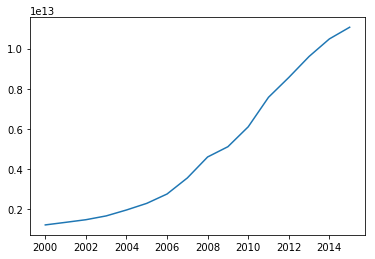

In [32]:
plt.plot(df[df.Country=='China'].Year, df[df.Country=='China']['GDP'])